In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from comet_ml import Experiment
import auth
import pickle
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


%matplotlib inline

In [2]:
# Load pre-processed data (with engineered features & downsampled classes)

df = pd.read_csv('./data/moma_baseline_model_balanced_dataset_05_11_2011.csv')

df.head()

,index,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,...,print_keyword,drawing_paper_word,drawing_keyword,painting_keyword,photo_keyword,has_3dimensions,furniture_keyword,decorative_obj_keyword,area,is_drawing
0,67648,Catullus from the portfolio Six Latin Writers ...,Cy Twombly,5988,"(American, 1928–2011)",American,1928,2011,Male,1975-1976,...,True,False,False,False,False,False,False,False,838.20,False
1,87448,Lips from To Kiss Your Lips,Julia Jacquette,8121,"(American, born 1964)",American,1964,0,Female,1999,...,True,False,False,False,False,False,False,False,761.76,False
2,70170,Cockatoo AAA Dracula,Billy Al Bengston,472,"(American, born 1934)",American,1934,0,Male,1968,...,True,False,False,False,False,False,False,False,766.80,False
3,60790,Star I,Yamaguchi Gen,6481,"(Japanese, 1896–1976)",Japanese,1896,1976,Male,1963,...,True,False,False,False,False,False,False,False,1607.20,False
4,71552,Third Class (Terceira classe) from the series ...,Lasar Segall,5317,"(Brazilian, 1889 - 1957)",Brazilian,1889,1957,Male,1928,...,True,False,False,False,False,False,False,False,894.24,False


In [3]:
# Reset Index

df.index = df['index']
df.drop(columns='index', inplace=True)

df.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,print_keyword,drawing_paper_word,drawing_keyword,painting_keyword,photo_keyword,has_3dimensions,furniture_keyword,decorative_obj_keyword,area,is_drawing
index,,,,,,,,,,,,,,,,,,,,,
67648,Catullus from the portfolio Six Latin Writers ...,Cy Twombly,5988,"(American, 1928–2011)",American,1928,2011,Male,1975-1976,One from a portfolio of seven embossed lithogr...,...,True,False,False,False,False,False,False,False,838.20,False
87448,Lips from To Kiss Your Lips,Julia Jacquette,8121,"(American, born 1964)",American,1964,0,Female,1999,One from a suite of four etchings,...,True,False,False,False,False,False,False,False,761.76,False
70170,Cockatoo AAA Dracula,Billy Al Bengston,472,"(American, born 1934)",American,1934,0,Male,1968,Lithograph,...,True,False,False,False,False,False,False,False,766.80,False
60790,Star I,Yamaguchi Gen,6481,"(Japanese, 1896–1976)",Japanese,1896,1976,Male,1963,"Lithograph, embossed and cut",...,True,False,False,False,False,False,False,False,1607.20,False
71552,Third Class (Terceira classe) from the series ...,Lasar Segall,5317,"(Brazilian, 1889 - 1957)",Brazilian,1889,1957,Male,1928,Etching,...,True,False,False,False,False,False,False,False,894.24,False


In [4]:
# Select columns to use as featureset

cols_to_use = ['long_list_of_things'
        , 'installation_keyword'
        , 'print_keyword'
        , 'drawing_paper_word'
        , 'drawing_keyword'
        , 'painting_keyword'
        , 'photo_keyword'
        , 'has_3dimensions'
        , 'furniture_keyword'
        , 'decorative_obj_keyword'
        , 'is_drawing'
              ]

In [5]:
#Create labels & Training data 

y = pd.get_dummies(df['Classification'])

X = df[cols_to_use]


# Segragate Data into test, train split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=88)


In [6]:
# Create an experiment

experiment = Experiment(api_key=auth.comet_api_key,
                         project_name="artwork-classification", workspace="lazell")

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/lazell/artwork-classification/4e6b35e093704805bbbc142ef97fe328



In [7]:
# Train Decision Tree Classifier
clf = DecisionTreeClassifier(min_samples_split=10
                             ,max_depth=9
                             ).fit(X_train, y_train)

In [8]:
# Get Test Results

results = clf.predict(X_test)
y_pred = pd.DataFrame(columns=y_test.columns
                      , data=results
                      , index=X_test.index)

In [9]:
# Get Results
accuracy_score(y_test, y_pred)

0.8412921348314607

In [10]:
print(classification_report(y_test, y_pred, target_names=y_test.columns))

                   precision    recall  f1-score   support

          Drawing       0.96      0.88      0.92       306
     Installation       0.90      0.49      0.63       150
         Painting       0.92      0.79      0.85       316
       Photograph       0.97      0.91      0.94       293
            Print       0.95      0.90      0.92       264
        Sculpture       0.76      0.78      0.77       295
decorative_object       0.95      0.88      0.92       310
        furniture       0.94      0.99      0.96       202

        micro avg       0.92      0.84      0.88      2136
        macro avg       0.92      0.83      0.86      2136
     weighted avg       0.92      0.84      0.88      2136
      samples avg       0.84      0.84      0.84      2136



/Users/katielazell-fairman/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
# Get Feature Importances
df_feature_importances = pd.DataFrame(data=clf.feature_importances_
                                      ,index=X_train.columns).sort_values(0, ascending=False)
df_feature_importances

,0
print_keyword,0.181488
photo_keyword,0.166202
decorative_obj_keyword,0.156766
is_drawing,0.138225
furniture_keyword,0.131517
has_3dimensions,0.109324
painting_keyword,0.067735
installation_keyword,0.032005
drawing_paper_word,0.011479
long_list_of_things,0.004805


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

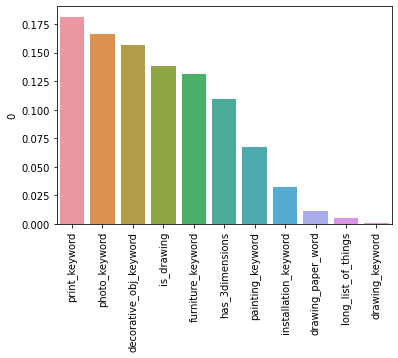

In [12]:
# Plot Importances

sns.barplot(y=df_feature_importances[0],x=df_feature_importances.index)
plt.xticks(rotation='vertical')

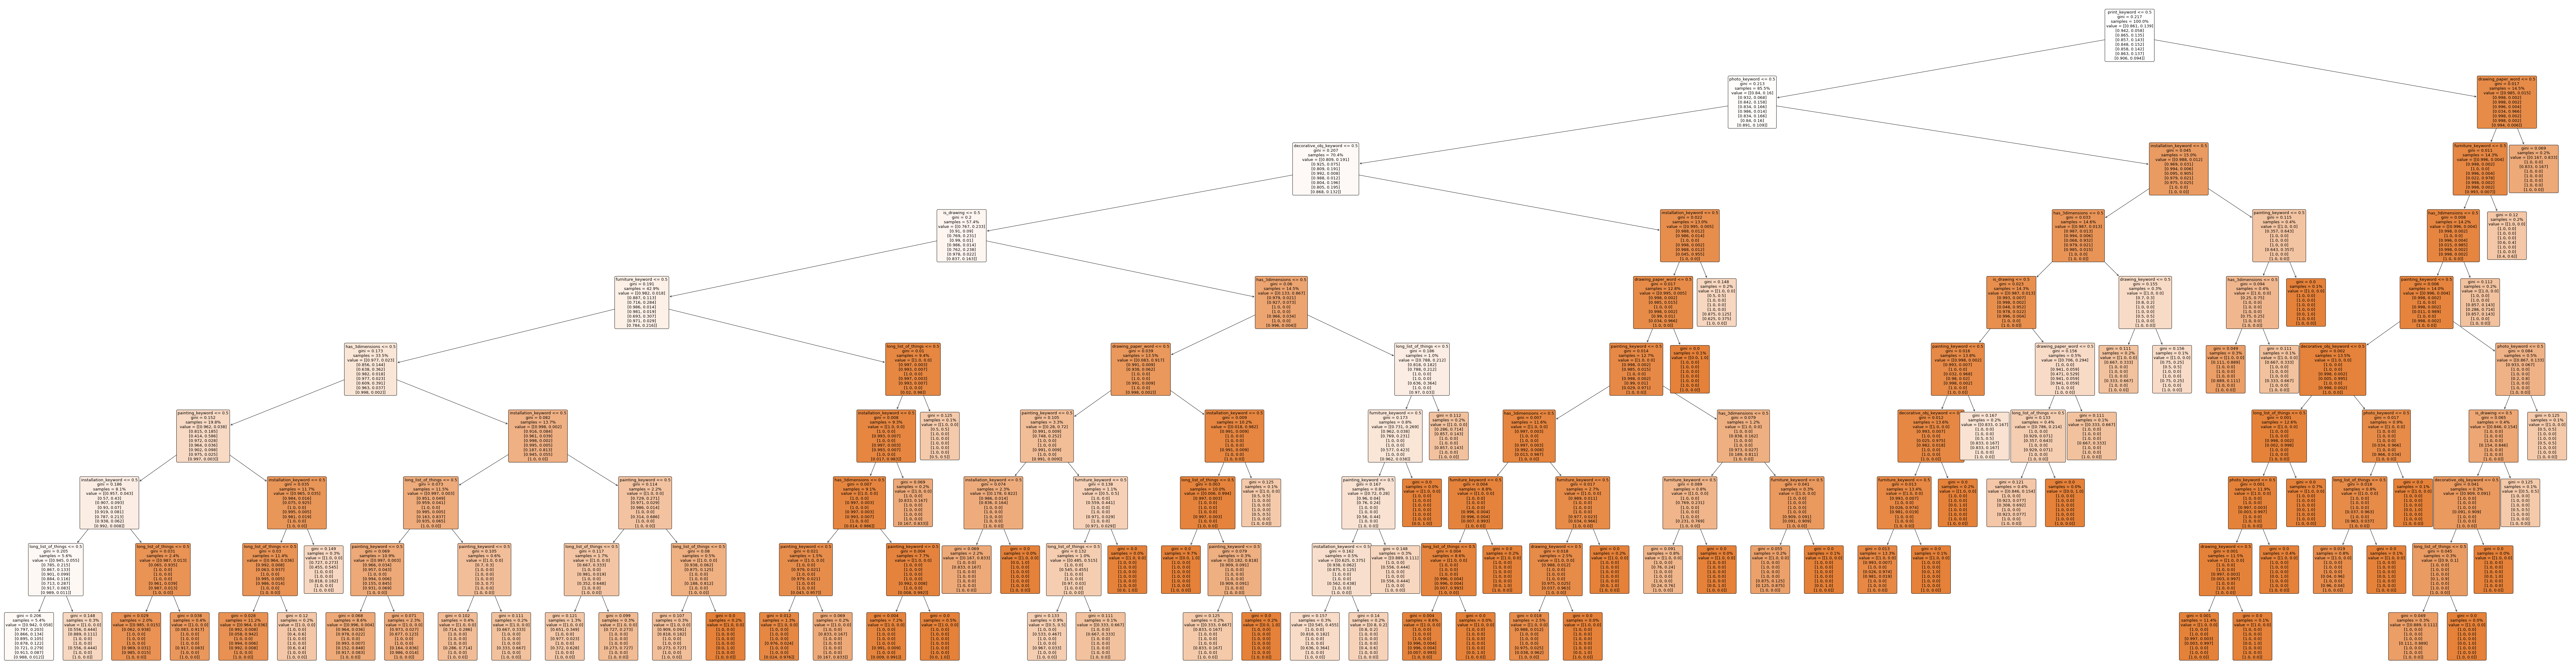

In [13]:
plt.figure(figsize=(150,40))
a = plot_tree(clf, 
              feature_names=X_train.columns, 
              class_names=y_train.columns, 
              filled=True, 
              rounded=True,
              proportion=True,
              fontsize=13)

In [17]:
# Save to model

model = {'model': clf,
         'features': cols_to_use,
         'labels' : list(y_train.columns)}

pkl_filename = "model_1_DecisionTreeClassifier.pkl"
with open('./models/'+pkl_filename, 'wb') as file:
    pickle.dump(model, file)